# Mi EDA para la Predicción de Diabetes
- El objetivo es claro: queremos investigar qué factores o características médicas de un paciente se asocian con un diagnóstico positivo de diabetes.
- He seleccionado Outcome como mi variable objetivo. Esta variable es binaria (0 para No Diabetes, 1 para Diabetes), por lo que estamos ante un problema de clasificación.

### 1: Identificación del Problema y Carga de Datos:

- Primero, importo las librerías que utilizaré y cargo los datos desde la URL proporcionada.

In [48]:
# Importo las librerías que se utilizarán
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn para que coincida con los notebooks
sns.set_style("whitegrid")

# URL del dataset
url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"

# Carga de datos
df = pd.read_csv(url)

# Muestro las primeras filas para un vistazo inicial
df.head()# Your code here

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2: Limpieza de Datos:
Antes de hacer cualquier análisis, necesito entender la estructura de mis datos, verificar tipos, buscar valores nulos y detectar posibles anomalías.

In [49]:
# Obtengo información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


A primera vista, los datos parecen estar completos (sin nulos) y todas las columnas son numéricas, lo cual es bueno. Sin embargo, vamos a hacer un .describe() para ver las estadísticas y buscar cosas raras.

In [50]:
# Estadísticas descriptivas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Aquí detecto un problema clásico y crítico de este dataset. Columnas como Glucose, BloodPressure, SkinThickness, Insulin y BMI tienen valores mínimos de 0. Fisiológicamente, esto es imposible (un BMI o Glucosa de 0 no es compatible con la vida). Estos ceros son, en realidad, valores nulos disfrazados.

Mi primer paso de limpieza será reemplazar estos ceros por np.nan para poder tratarlos correctamente.

In [51]:
# Lista de columnas con ceros imposibles
cols_con_ceros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Reemplazo 0 con np.nan en esas columnas
df[cols_con_ceros] = df[cols_con_ceros].replace(0, np.nan)

# Ahora, volvamos a revisar los nulos
print("Valores nulos REALES después de la limpieza:")
df.isnull().sum()

Valores nulos REALES después de la limpieza:


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Ahora sí vemos la verdadera cantidad de datos faltantes. Insulin y SkinThickness tienen una cantidad considerable.
- Para este análisis, voy a optar por una estrategia de imputación simple, usando la media de cada columna para rellenar los nulos, y así no perder tantas filas.

In [52]:
# Imputación de nulos con la media de cada columna
df = df.fillna(df.mean())

# Verifico que ya no queden nulos
print("\nValores nulos después de la imputación:")
df.isnull().sum()


Valores nulos después de la imputación:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Perfecto, los datos están limpios. Ahora, analicemos la variable objetivo, Outcome.**

### 3: Analisis univariante
- Comenzaré analizando la variable objetivo, para ello observare la distribución para tener una idea clara.


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


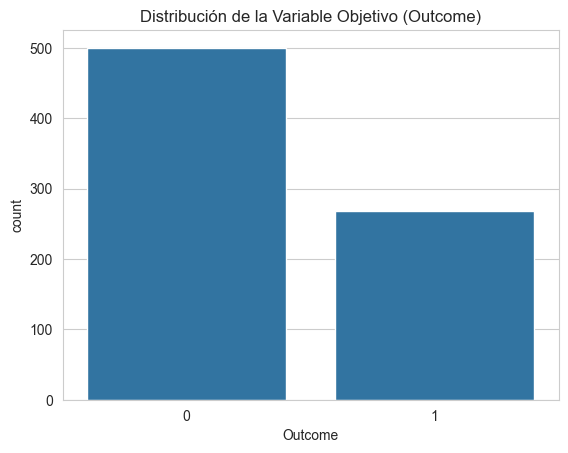

In [53]:
# Análisis de la variable objetivo
# Normalizo para ver la distribución en porcentaje
print(df['Outcome'].value_counts(normalize=True))

# Visualización de la variable objetivo
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de la Variable Objetivo (Outcome)')
plt.show()

Observamos un desbalanceo: aproximadamente el 65% de los pacientes no tienen diabetes (0) y el 35% sí la tienen (1). No es un desbalanceo extremo, así que podemos proceder.

Finalmente, veamos la distribución del resto de las variables numéricas.

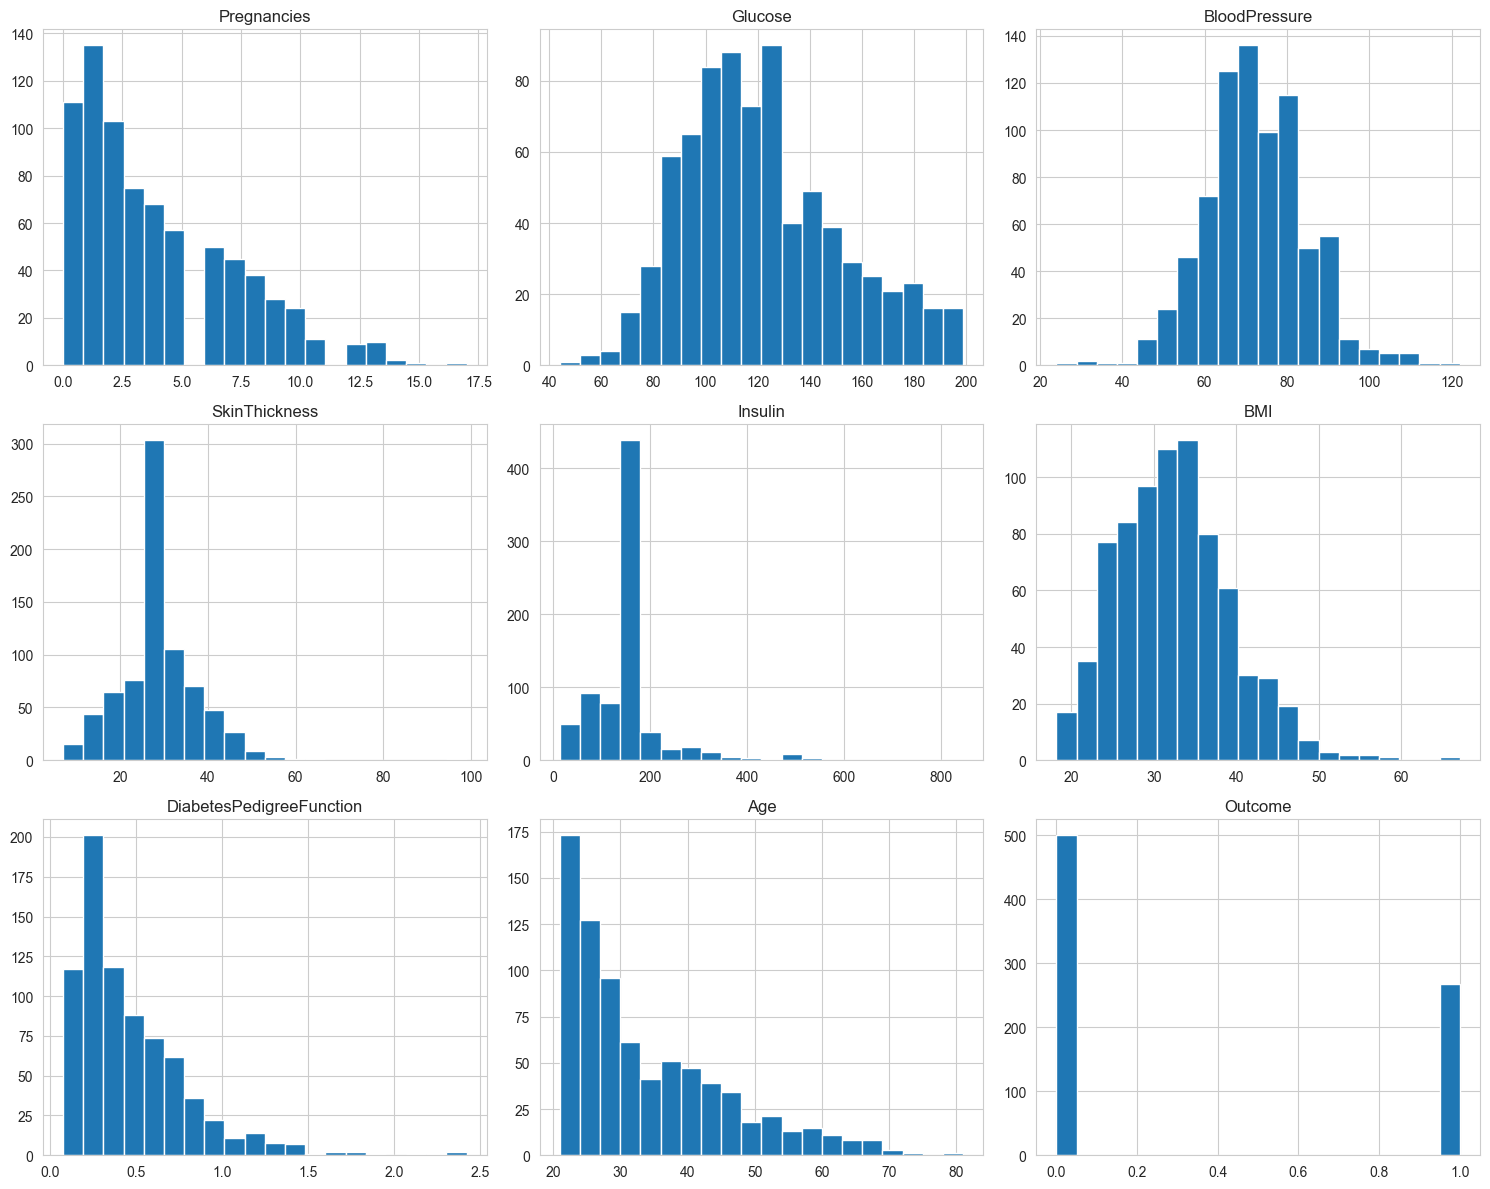

In [54]:
# Histogramas de todas las variables
df.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

**Las distribuciones nos dan una idea de los rangos:**

- Age y Pregnancies están sesgadas a la derecha (la mayoría son jóvenes o con pocos embarazos).

- Glucose y BMI se asemejan un poco más a una distribución normal.

- Insulin y DiabetesPedigreeFunction están muy sesgadas.

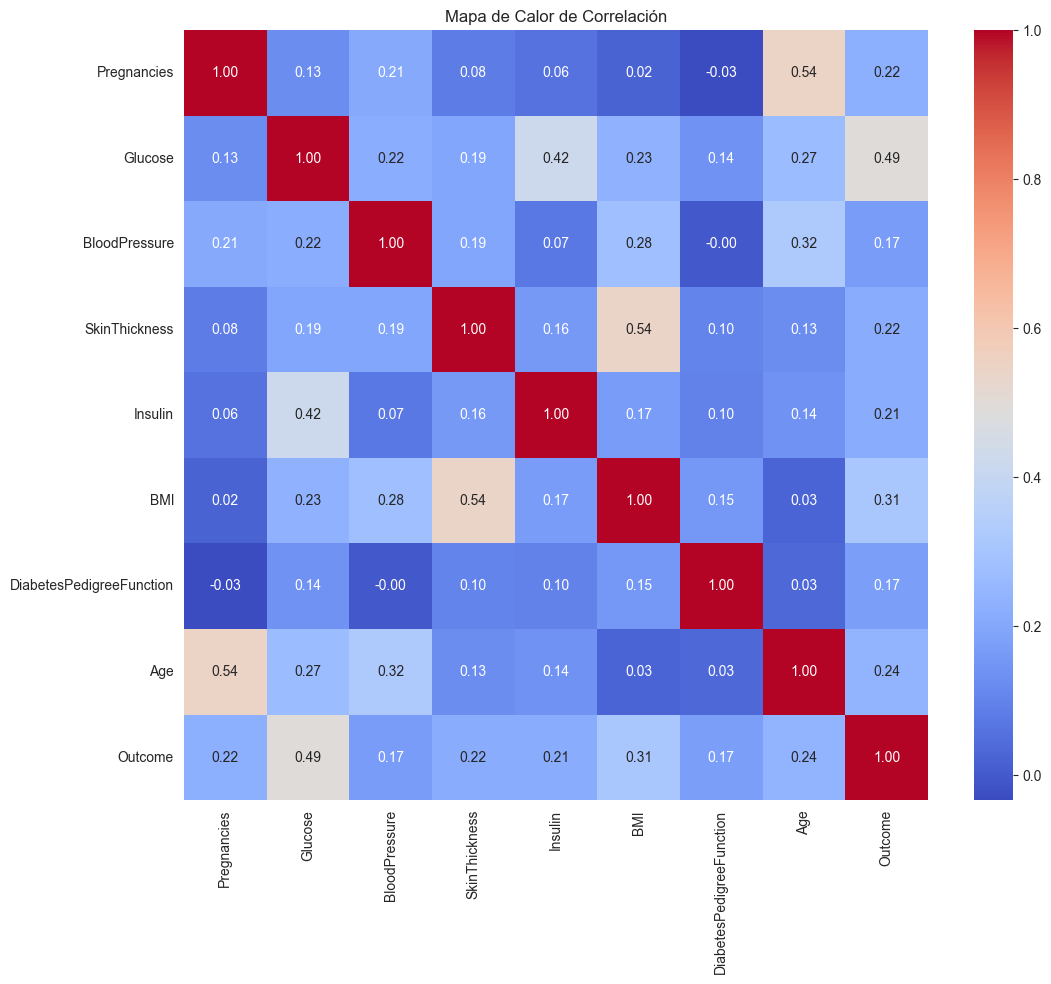

In [55]:
# Calculo la matriz de correlación
corr_matrix = df.corr()

# Dibujo el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

**Interpretando el heatmap, específicamente la fila de Outcome:**

- Glucose (0.49) tiene la correlación positiva más fuerte. Esto es lógico: niveles más altos de glucosa son el principal indicador de diabetes.

- BMI (0.31) y Age (0.24) también muestran correlaciones positivas relevantes.

- Pregnancies (0.22) también tiene una correlación, aunque menor.

Las demás variables (BloodPressure, SkinThickness, etc.) tienen correlaciones más débiles con Outcome(.17).

### 4: Visualización de relaciones clave:
Vamos a profundizar en las variables que el heatmap señaló como importantes (Glucose, BMI, Age). Dado que Outcome es categórico, los boxplots o violinplots son ideales para comparar las distribuciones entre los dos grupos (0 y 1).

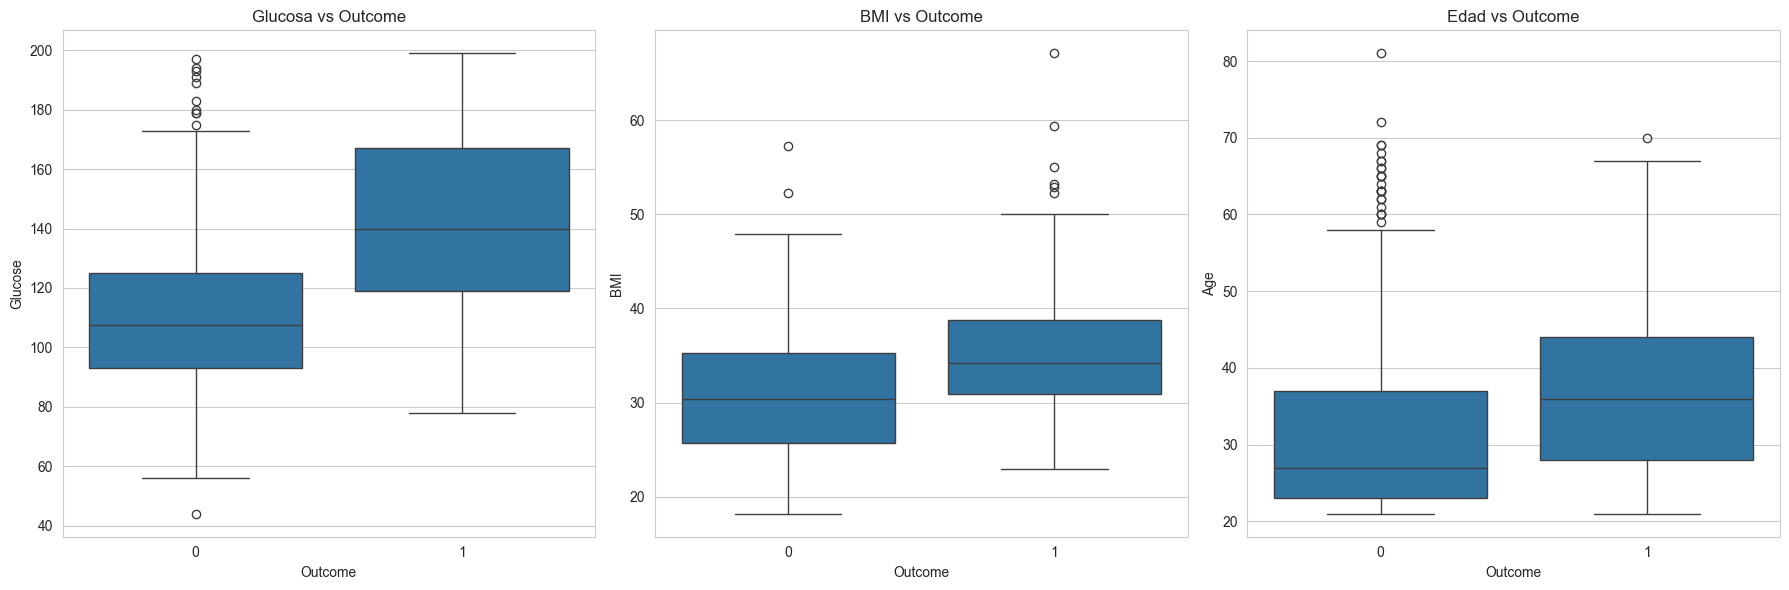

In [56]:
# Creando boxplots para las variables más correlacionadas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], x='Outcome', y='Glucose', data=df)
axes[0].set_title('Glucosa vs Outcome')

sns.boxplot(ax=axes[1], x='Outcome', y='BMI', data=df)
axes[1].set_title('BMI vs Outcome')

sns.boxplot(ax=axes[2], x='Outcome', y='Age', data=df)
axes[2].set_title('Edad vs Outcome')

plt.tight_layout()
plt.show()

**Los gráficos son muy claros:**

- Glucosa: La mediana y todo el rango intercuartílico de glucosa para el grupo 1 (Diabetes) es significativamente más alta que para el grupo 0.

- BMI: Se repite el patrón. Los pacientes con diabetes tienden a tener un Índice de Masa Corporal (BMI) más alto.

- Edad: La mediana de edad también es visiblemente mayor en el grupo con diabetes.

Un pairplot nos puede dar una visión general fantástica de las interacciones, usando el Outcome para colorear los puntos.

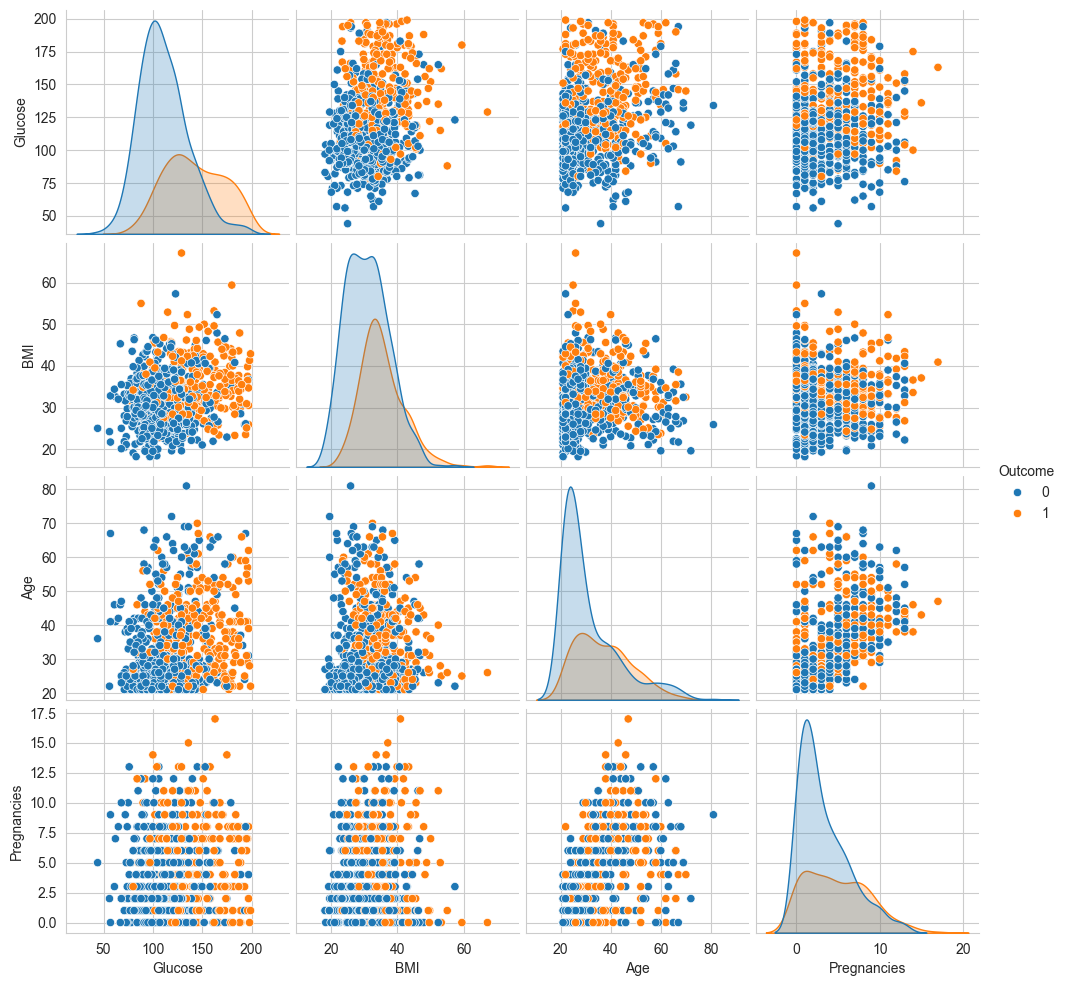

In [57]:
# Pairplot de las variables más importantes
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Pregnancies'])
plt.show()

El pairplot confirma visualmente que la separación más clara entre los puntos azules (0) y naranjas (1) ocurre a lo largo del eje Glucose.

Para este tipo de datos no es necesario escalar ni hace one hot coding ya que las columnas clave son numericas.

In [58]:
# Ahora nos quedamos con la data limpia para su posterior entrenamiento
data_processed = df[['Glucose', 'BMI', 'Age', 'Pregnancies','Outcome']]
data_processed.head()

,Glucose,BMI,Age,Pregnancies,Outcome
0,148.0,33.6,50,6,1
1,85.0,26.6,31,1,0
2,183.0,23.3,32,8,1
3,89.0,28.1,21,1,0
4,137.0,43.1,33,0,1


In [59]:
# Guardamos la data procesada para entrenamiento
import pickle
pickle.dump(data_processed, open('../data/processed/data_processed.csv', 'wb'))

# Conclusión General:
En este EDA, hemos seguido una estructura metodológica para analizar el dataset de diabetes:

- Cargamos los datos e identificamos el problema como uno de clasificación binaria.

- Realizamos una limpieza crucial, identificando que los valores 0 en columnas médicas eran nulos disfrazados. Los imputamos usando la media.

- Analizamos la correlación y descubrimos que Glucose, BMI y Age son los factores más fuertemente asociados con un diagnóstico de diabetes.

- Visualizamos estas relaciones clave, confirmando que valores más altos en estas tres métricas aumentan la probabilidad de tener un Outcome de 1.
Con este EDA completo, tenemos una base sólida y un modelo inicial para las siguientes fases del proyecto, como podrían ser la optimización del modelo (probando otros algoritmos, ajuste de hiperparámetros) o un análisis más profundo de las características.

# Entrenando modelo Decision Tree
Utilizare el modelo de arboles de decisiones para determinar si una persona tiene diabetes (1) oh no (0)

from sklearn.model_selection import

### 1: Divido la data de entrenamiento y testeo
Utilizare train_test_split de sklearn para realizarlo.

In [60]:
from sklearn.model_selection import train_test_split
# Selecciono la data para X
X = data_processed.drop('Outcome', axis=1)

# Selecciono solo la variable objetivo en este caso Outcome para y
y = data_processed['Outcome']

# Utilizo train_test_split para dividir la data y entrenarla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Glucose,BMI,Age,Pregnancies
60,84.0,32.457464,21,2
618,112.0,28.200000,50,9
346,139.0,28.700000,22,1
294,161.0,21.900000,65,0
231,134.0,46.200000,46,6


Realizare una visualizacion con un grafico integrado con pandas


<Axes: >

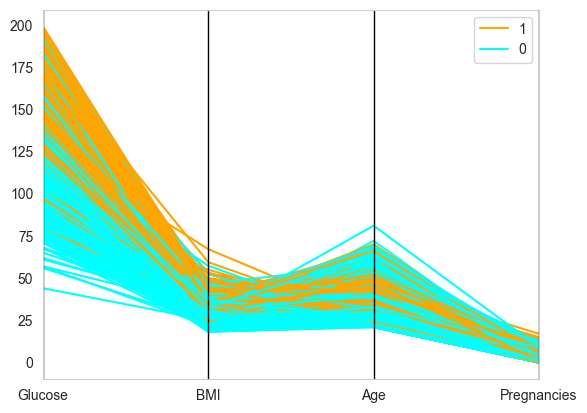

In [61]:
# Grafico usando el grafico parallel_coordinates

pd.plotting.parallel_coordinates(data_processed, 'Outcome', color = ('orange', 'cyan'))

Vemos como se reparten los valores de las predictorias con las variables objetivo:
- 1 para si presenta diabetes
- 0 para no presenta diabetes

### 2: Inicialización y entrenamiento del modelo

In [62]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Una vez que el modelo ha sido entrenado podemos visualizar el arbol

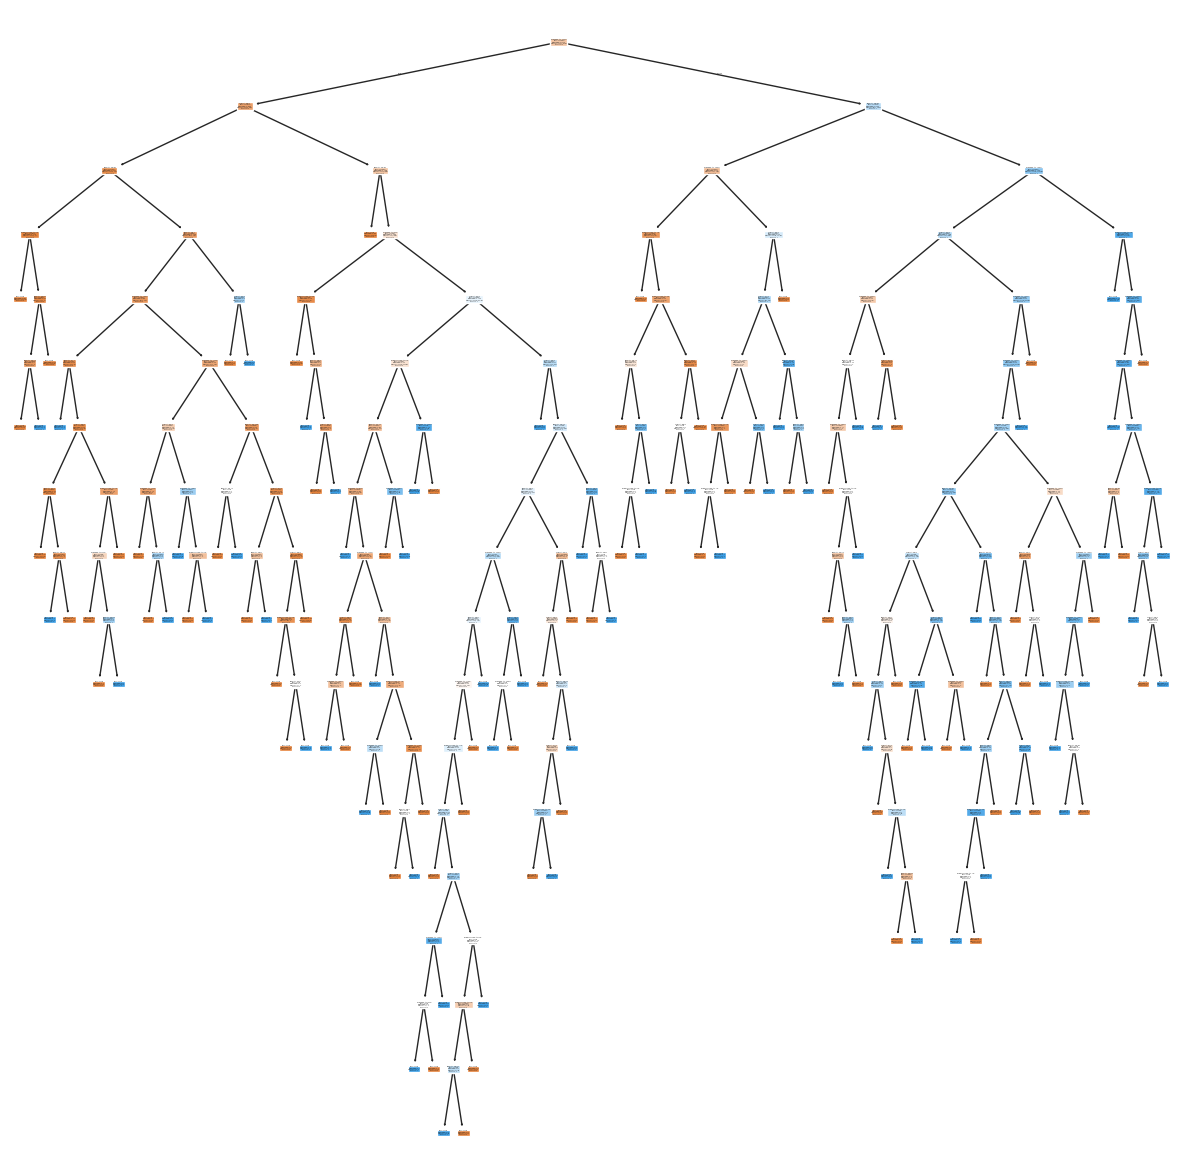

In [63]:
# Grafico arboles de decision
from sklearn import tree

fig = plt.figure(figsize=(15, 15))

tree.plot_tree(model_decision_tree, feature_names= list(X_train.columns), class_names=['0','1'], filled=True)

plt.show()



El grafico es la representación visual de cada decision que tomo el algoritmo

### 3: Predicción del modelo

In [64]:
y_pred_tree = model_decision_tree.predict(X_test)
y_pred_tree

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

Comparamos los datos en crudo con la realidad para ver que tanta precision tiene nuetro modelo, utilizaré accuracy, que es la fracción de deciciones que el modelo realizo correctamente
-Decidi posterior agregar la metrica de mean_squared_error (RMSE) para verificar el error cuadratico medio.


In [65]:
from sklearn.metrics import accuracy_score, mean_squared_error
# accuracy
accuracy_score(y_test, y_pred_tree)

# mean squared error
mean_squared_error(y_test, y_pred_tree)

print(f"accuracy score: {accuracy_score(y_test, y_pred_tree)}")
print(f"mean squared error: {mean_squared_error(y_test, y_pred_tree)}")

accuracy score: 0.7272727272727273
mean squared error: 0.2727272727272727


El modelo tienen una precision del 72% aproximadamente lo cual indica muy buen nivel de precisión, ademas podemos corroborarlo con un RMSE de .27

Procederé a guardar el modelo usando la libreria pickle


In [66]:
import pickle

pickle.dump(model_decision_tree, open('../models/model_decision_tree.pkl', 'wb'))
print(f"Modelo de arboles de decisiones guardado correctamente en la carpeta models.")

Modelo de arboles de decisiones guardado correctamente en la carpeta models.
